In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

%matplotlib inline

In [2]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Load barcodes used in experiment
guide_df = pd.read_csv('../common_files/Barcodes.csv')

# Extended Data Figure 2A, 6A, 7A

In [4]:
# Create list of all Metadata columns by loading header of single file
df = pd.read_csv('inputs/20210422_6W_CP257_single_cell_profiles_ALLBATCHES___CP257A___ALLWELLS.csv.gz', nrows=10)
col_list = [x for x in df.columns if 'Metadata' in x]
print (f'There are {len(col_list)} Metadata columns')

There are 31 Metadata columns


In [ ]:
# Load and subset the single-cell profiles per plate for HeLa DMEM plates
plates = ['CP257A','CP257B','CP257D','CP257F','CP257H']
chunksize = 10 ** 5

HeLa_DMEM_list = []
for plate in plates:
    filename = f'20210422_6W_CP257_single_cell_profiles_ALLBATCHES___{plate}___ALLWELLS.csv.gz' 
    df = pd.read_csv(filename, nrows=20)
    col_list = list(df)[:31]
    chunks = []
    with pd.read_csv(filename,usecols=col_list ,chunksize=chunksize) as reader:
        for chunk in reader:
            chunks.append(chunk)
            print(chunk.shape,f'of plate {plate}')
    df = pd.concat(chunks)
    df.to_csv(os.path.join(output_folder,f'HeLa_DMEM_single_cell_metadata_{plate}_ALLWELLS.csv.gz'),index = False)
    HeLa_DMEM_list.append(df)

HeLa_DMEM_metadata_df = pd.concat(HeLa_DMEM_list)
HeLa_DMEM_metadata_df.to_csv(os.path.join(output_folder,'HeLa_DMEM_single_cell_metadata.csv.gz'),index = False)

In [ ]:
# Load and subset the single-cell profiles per plate for HeLa HPLM plates
plates = ['CP257J','CP257K','CP257L','CP257N']
chunksize = 10 ** 5

HeLa_HPLM_list = []
for plate in plates:
    filename = f'20210422_6W_CP257_single_cell_profiles_ALLBATCHES___{plate}___ALLWELLS.csv.gz' 
    chunks = []
    with pd.read_csv(filename,usecols=col_list ,chunksize=chunksize) as reader:
        for chunk in reader:
            chunks.append(chunk)
            print(chunk.shape,f'of plate {plate}')
    df = pd.concat(chunks)
    df.to_csv(os.path.join(output_folder,f'HeLa_HPLM_single_cell_metadata_{plate}_ALLWELLS.csv.gz'),index = False)
    HeLa_HPLM_list.append(df)

HeLa_HPLM_metadata_df = pd.concat(HeLa_HPLM_list)
HeLa_HPLM_metadata_df.to_csv(os.path.join(output_folder,'HeLa_HPLM_single_cell_metadata.csv.gz'),index = False)

In [ ]:
# Load and subset the single-cell profiles per plate for A549
plates = ['CP186A','CP186B','CP186C','CP186D','CP186E','CP186F','CP186G','CP186H','CP186N']
chunksize = 10 ** 5

A549_list = []
for plate in plates:
    filename = f'20200805_A549_WG_Screen_single_cell_profiles_ALLBATCHES___{plate}___ALLWELLS.csv.gz' 
    chunks = []
    with pd.read_csv(filename,usecols=col_list ,chunksize=chunksize) as reader:
        for chunk in reader:
            chunks.append(chunk)
            print(chunk.shape,f'of plate {plate}')
    df = pd.concat(chunks)
    df.to_csv(os.path.join(output_folder,f'A549_single_cell_metadata_{plate}_ALLWELLS.csv.gz'),index = False)
    A549_list.append(df)

A549_metadata_df = pd.concat(A549_list)
A549_metadata_df.to_csv(os.path.join(output_folder,'A549_single_cell_metadata.csv.gz'),index = False)

In [10]:
# Organize the data and calculate cell count per gene and per guide
A549_count_gene_df = A549_metadata_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
A549_count_gene_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
A549_count_guide_df = A549_metadata_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
A549_count_guide_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

HeLa_DMEM_count_gene_df = HeLa_DMEM_metadata_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
HeLa_DMEM_count_gene_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
HeLa_DMEM_count_guide_df = HeLa_DMEM_metadata_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
HeLa_DMEM_count_guide_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

HeLa_HPLM_count_gene_df = HeLa_HPLM_metadata_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
HeLa_HPLM_count_gene_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
HeLa_HPLM_count_guide_df = HeLa_HPLM_metadata_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
HeLa_HPLM_count_guide_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

# Number of unique barcodes and genes
A549_gene_n = len(A549_count_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
A549_guide_n = len(A549_count_guide_df.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

HeLa_DMEM_gene_n = len(HeLa_DMEM_count_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
HeLa_DMEM_guide_n = len(HeLa_DMEM_count_guide_df.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

HeLa_HPLM_gene_n = len(HeLa_HPLM_count_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
HeLa_HPLM_guide_n = len(HeLa_HPLM_count_guide_df.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

print(f"A549 screen \n {A549_gene_n} Unique genes, {A549_guide_n} Unique guides, {A549_count_gene_df.Cell_Count.sum()} Total cell count")
print(f'HeLa DMEM screen \n {HeLa_DMEM_gene_n} Unique genes, {HeLa_DMEM_guide_n} Unique guides, {HeLa_DMEM_count_gene_df.Cell_Count.sum()} Total cell count')
print(f'HeLa HPLM screen \n {HeLa_HPLM_gene_n} Unique genes, {HeLa_HPLM_guide_n} Unique guides, {HeLa_HPLM_count_gene_df.Cell_Count.sum()} Total cell count')

A549 screen 
 20393 Unique genes, 80860 Unique guides, 11211357 Total cell count
HeLa DMEM screen 
 20422 Unique genes, 84272 Unique guides, 12319688 Total cell count
HeLa HPLM screen 
 20421 Unique genes, 84253 Unique guides, 9118260 Total cell count


In [15]:
# Concatenate gene and guide cell counts into a single dataframe - calculate number of cells per guide and per gene
df_temp = guide_df[['gene_symbol','sgRNA']].rename(columns={"sgRNA":"Metadata_Foci_Barcode_MatchedTo_Barcode"})
A549_count_df = A549_count_guide_df.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
A549_count_df = A549_count_df[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

HeLa_DMEM_count_df = HeLa_DMEM_count_guide_df.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
HeLa_DMEM_count_df = HeLa_DMEM_count_df[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

HeLa_HPLM_count_df = HeLa_HPLM_count_guide_df.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
HeLa_HPLM_count_df = HeLa_HPLM_count_df[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

A549_count_df_no_control = A549_count_df.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
A549_cells_per_gene = A549_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True).mean()[0]
A549_cells_per_guide = A549_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True).mean()[0]

HeLa_DMEM_count_df_no_control = HeLa_DMEM_count_df.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
HeLa_DMEM_cells_per_gene = HeLa_DMEM_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True).mean()[0]
HeLa_DMEM_cells_per_guide = HeLa_DMEM_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True).mean()[0]

HeLa_HPLM_count_df_no_control = HeLa_HPLM_count_df.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
HeLa_HPLM_cells_per_gene = HeLa_HPLM_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True).mean()[0]
HeLa_HPLM_cells_per_guide = HeLa_HPLM_count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True).mean()[0]

print(f'A549 screen \n {round(A549_cells_per_gene,2)} cells per gene, {round(A549_cells_per_guide,2)} cells per guide')
print(f'HeLa DMEM screen \n {round(HeLa_DMEM_cells_per_gene,2)} cells per gene, {round(HeLa_DMEM_cells_per_guide,2)} cells per guide')
print(f'HeLa HPLM screen \n {round(HeLa_HPLM_cells_per_gene,2)} cells per gene, {round(HeLa_HPLM_cells_per_guide,2)} cells per guide')

A549 screen 
 459.78 cells per gene, 116.6 cells per guide
HeLa DMEM screen 
 490.59 cells per gene, 124.5 cells per guide
HeLa HPLM screen 
 366.35 cells per gene, 92.99 cells per guide


In [6]:
# Save the cell counts
A549_count_df.to_csv(os.path.join(output_folder,'A549_cell_count.csv.gz'),index = False)
HeLa_DMEM_count_df.to_csv(os.path.join(output_folder,'HeLa_DMEM_cell_count.csv.gz'),index = False)
HeLa_HPLM_count_df.to_csv(os.path.join(output_folder,'HeLa_HPLM_cell_count.csv.gz'),index = False)

In [18]:
# Plot the results
def plot_distribution(df_count,data_set):
    sns.set_theme()

    fig, ax = plt.subplots()

    counts_1 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True)
    counts_1 = counts_1.query('Cell_Count  < 1300')
    counts_1 = counts_1['Cell_Count']
    counts_2 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True)
    counts_2 = counts_2.query('Cell_Count  < 800')
    counts_2 = counts_2['Cell_Count']
    
    sns.histplot(counts_1 ,color='b' ,bins= 200, kde=True, alpha=0.5,ax = ax);
    sns.histplot(counts_2 ,color='r' ,bins= 200, kde=True, alpha=0.5,ax = ax);

    ax.set_title(f'Cells Count Distribution for {data_set} Screen')
    ax.set_ylabel('Number of cells')
    ax.set_xlabel('Distribution')

    ax.legend(['Cells per gene','Cells per guide'])

    fig.savefig(os.path.join(output_folder,'figure_panels',f'{data_set}_cells_gene_distribution.png'),
                dpi=200,
                facecolor='w',
                edgecolor='w')
    plt.show()


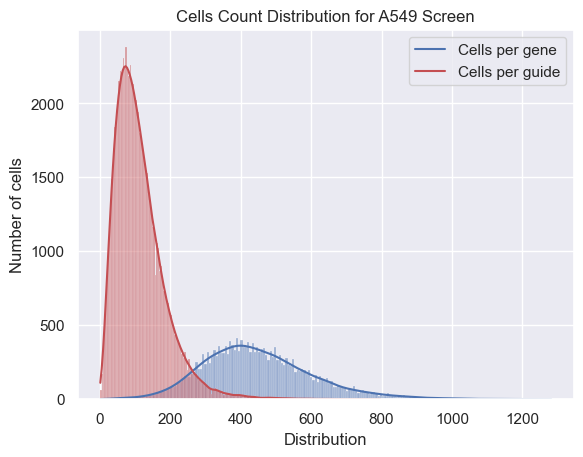

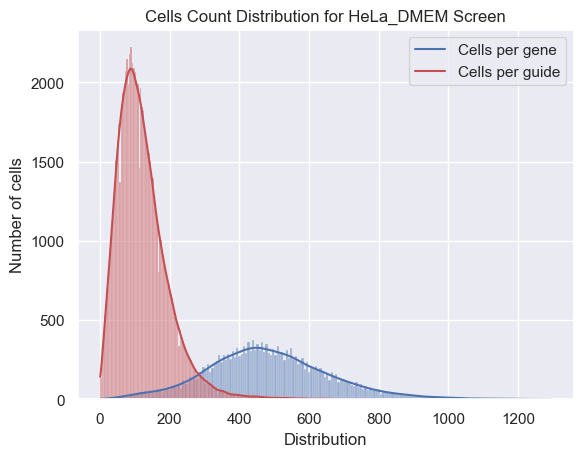

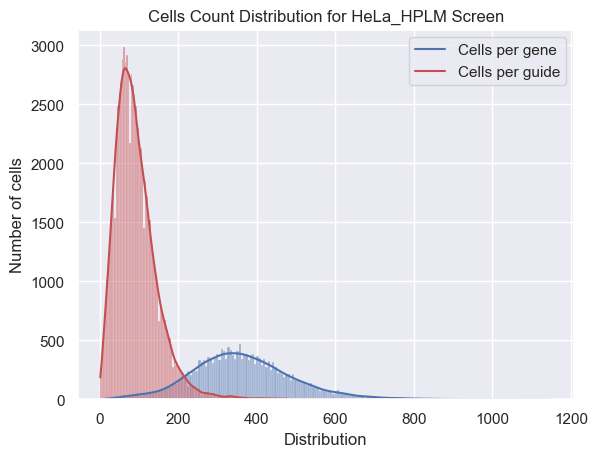

In [19]:
plot_distribution(A549_count_df_no_control,'A549')
plot_distribution(HeLa_DMEM_count_df_no_control,'HeLa_DMEM')
plot_distribution(HeLa_HPLM_count_df_no_control,'HeLa_HPLM')

# Extended Data Figure 2B, 6B, 7B

In [6]:
# If not running straight through, load cell count data
"""
A549_count_df = pd.read_csv(os.path.join(output_folder,'A549_cell_count.csv.gz'))
HeLa_DMEM_count_df = pd.read_csv(os.path.join(output_folder,'HeLa_DMEM_cell_count.csv.gz'))
HeLa_HPLM_count_df = pd.read_csv(os.path.join(output_folder,'HeLa_HPLM_cell_count.csv.gz'))
"""

# Normalize Cell count data
HeLa_DMEM_count_df['Fraction'] = HeLa_DMEM_count_df['Cell_Count']/(HeLa_DMEM_count_df['Cell_Count'].sum())
HeLa_DMEM_count_df.sort_values('Cell_Count', ascending = False).reset_index()
HeLa_DMEM_count_df['12bp_barcode'] = HeLa_DMEM_count_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].apply(lambda x: str(x)[:12])

HeLa_HPLM_count_df['Fraction'] = HeLa_HPLM_count_df['Cell_Count']/(HeLa_HPLM_count_df['Cell_Count'].sum())
HeLa_HPLM_count_df.sort_values('Cell_Count', ascending = False).reset_index()
HeLa_HPLM_count_df['12bp_barcode'] = HeLa_HPLM_count_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].apply(lambda x: str(x)[:12])

A549_count_df['Fraction'] = A549_count_df['Cell_Count']/(A549_count_df['Cell_Count'].sum())
A549_count_df.sort_values('Cell_Count', ascending = False).reset_index()
A549_count_df['12bp_barcode'] = A549_count_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].apply(lambda x: str(x)[:12])


In [9]:
# Load NGS files with for HeLa DMEM and HPLM samples. 
HeLa_NGS_reads = pd.read_csv(os.path.join(input_folder,'HeLa_NGS_Counts.csv'))

guide_df['12bp_barcode'] = guide_df['sgRNA'].apply(lambda x: str(x)[:12])
                          
# Create a dataframe for the DMEM samples
DMEM_Samples = ['BR1 DMEM + Dox', 'BR2 DMEM + Dox', 'BR3 DMEM +Dox']

HeLa_NGS_reads['Is_In'] = HeLa_NGS_reads['Sample'].isin(DMEM_Samples)
HeLa_DMEM_NGS = HeLa_NGS_reads[HeLa_NGS_reads['Is_In']==True]
HeLa_DMEM_NGS['12bp_barcode'] = HeLa_DMEM_NGS['Barcode'].apply(lambda x: str(x)[:12])
HeLa_DMEM_NGS = HeLa_DMEM_NGS.rename(columns={'Count':'NGS_count'})

# Filter DMEM dataframe for reads that map the barcode library
HeLa_DMEM_NGS['Mapping_Library'] = HeLa_DMEM_NGS['12bp_barcode'].isin(guide_df['12bp_barcode'])
HeLa_DMEM_NGS = HeLa_DMEM_NGS[HeLa_DMEM_NGS['Mapping_Library']==True]

# Create a dataframe for the HPLM arm
HPLM_Samples = ['BR1 HPLM + Dox', 'BR2 HPLM + Dox', 'BR3 HPLM +Dox']

HeLa_NGS_reads['Is_In'] = HeLa_NGS_reads['Sample'].isin(HPLM_Samples)
HeLa_HPLM_NGS = HeLa_NGS_reads[HeLa_NGS_reads['Is_In']==True]
HeLa_HPLM_NGS['12bp_barcode'] = HeLa_HPLM_NGS['Barcode'].apply(lambda x: str(x)[:12])
HeLa_HPLM_NGS = HeLa_HPLM_NGS.rename(columns={'Count':'NGS_count'})

# Filter HPLM dataframe for reads that map the barcode library
HeLa_HPLM_NGS['Mapping_Library'] = HeLa_HPLM_NGS['12bp_barcode'].isin(guide_df['12bp_barcode'])
HeLa_HPLM_NGS = HeLa_HPLM_NGS[HeLa_HPLM_NGS['Mapping_Library']==True]

# Load NGS files for A549 DMEM samples.
A549_NGS = pd.read_csv(os.path.join(input_folder,'A549_NGS_Counts.csv'))
A549_NGS.dropna()

A549_NGS['12bp_barcode'] = A549_NGS['Barcode'].apply(lambda x: str(x)[:12])
A549_NGS = A549_NGS.rename(columns={'Count':'NGS_count'})

A549_NGS['Mapping_Library'] = A549_NGS['12bp_barcode'].isin(guide_df['12bp_barcode'])
A549_NGS = A549_NGS[A549_NGS['Mapping_Library']==True]

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_9267/1334286883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeLa_DMEM_NGS['12bp_barcode'] = HeLa_DMEM_NGS['Barcode'].apply(lambda x: str(x)[:12])
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_9267/1334286883.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeLa_HPLM_NGS['12bp_barcode'] = HeLa_HPLM_NGS['Barcode'].apply(lambda x: str(x)[:12])


,Barcode,NGS_count,Fraction,log10,gene_symbol,12bp_barcode,Mapping_Library
0,GACTGAAATCCAAGGACTGT,1860.0,0.023283,-6.340503,nontargeting,GACTGAAATCCA,True
1,CAGCCTATTTTGCTACCTAC,1843.0,0.022526,-6.373748,nontargeting,CAGCCTATTTTG,True
2,TGCCCACTTAGCAACACTCT,1828.0,0.022214,-6.396342,nontargeting,TGCCCACTTAGC,True
3,CTGACAATGGAACTGACTGG,1721.0,0.020895,-6.487056,SUDS3,CTGACAATGGAA,True
4,CGGCTCGTTCTACGCACTGA,1644.0,0.020172,-6.517413,nontargeting,CGGCTCGTTCTA,True
...,...,...,...,...,...,...,...
75246,GATCTTAGAGTTCTCTTCAG,2.0,0.000017,-4.765881,CAMK1G,GATCTTAGAGTT,True
75247,GATCTTACCCAAAACAGCTC,2.0,0.000046,-4.341425,FAM60A,GATCTTACCCAA,True
75248,GATCTCGTAGAACACACAGC,2.0,0.000020,-4.692596,MOK,GATCTCGTAGAA,True
75249,GATCTCCTGGTGGTCGGCGG,2.0,0.000020,-4.693942,TXNRD2,GATCTCCTGGTG,True


In [40]:
# merge NGS reads with optical barcode calls. DMEM samples 
HeLa_DMEM_Merged = pd.merge(HeLa_DMEM_count_df,HeLa_DMEM_NGS,how='left',on='12bp_barcode')
HeLa_DMEM_Merged = HeLa_DMEM_Merged.groupby('12bp_barcode').first().reset_index().sort_values(by='Cell_Count',ascending=False).dropna()

# merge NGS reads with optical barcode calls. HPLM samples 
HeLa_HPLM_Merged = pd.merge(HeLa_HPLM_count_df,HeLa_HPLM_NGS,how='left',on='12bp_barcode')
HeLa_HPLM_Merged = HeLa_HPLM_Merged.groupby('12bp_barcode').first().reset_index().sort_values(by='Cell_Count',ascending=False).dropna()

# merge NGS reads with optical barcode calls. A549 samples
A549_Merged = pd.merge(A549_count_df,A549_NGS,how='left',on='12bp_barcode')
A549_Merged = A549_Merged.groupby('12bp_barcode').first().reset_index().sort_values(by='Cell_Count',ascending=False).dropna()


In [41]:
# One of the sgRNAs for gene KRT28, sgRNA: GTTGAAGAGCTAGATCAACG,  is an outlier in optical calls for all screening samples (A549, HeLa DMEM, and HeLa HPLM). 
# This guide is also identified as an outlier in comparison to NGS calls, where the average number of NGS reads assigned is 14 and the average number of optical calls was 79,000

# Remove outlier from sorted datframes
A549_Merged = A549_Merged.iloc[1:]
HeLa_HPLM_Merged = HeLa_HPLM_Merged.iloc[1:]
HeLa_DMEM_Merged = HeLa_DMEM_Merged.iloc[1:]


In [42]:
# Define figure functions to visualize and calculate pairwise correlations of guide abundance in NGS and  
def plot_scatter(data_set,x,y,x_name,y_name,x_lim,y_lim,r_loc_x,r_loc_y,r2_loc_x,r2_loc_y):
    
    sns.regplot(x=x,y=y,scatter=True, color = '#4169E1')
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='k')
    plt.xlabel(x_name, size=9)
    plt.ylabel(y_name, size=9)
    plt.xlim(0,x_lim)
    plt.ylim(0,y_lim)
    plt.ticklabel_format(axis='both', style='sci')

    
    global correlation
    correlation = np.corrcoef(x,y)[0,1]
    plt.text(r_loc_x,r_loc_y,r' $R:$' + str(round(correlation,4)), fontsize=9)
    plt.text(r2_loc_x,r2_loc_y,r' $R^2:$' + str(round((pow(correlation,2)),4)), fontsize=9)
    
    plt.savefig(os.path.join(output_folder, "figure_panels", f'{data_set}_{x_name}_vs_{y_name}.png'),
                dpi=400,
                facecolor='w',
                bbox_inches='tight',
                edgecolor='w')
    
    plt.show()

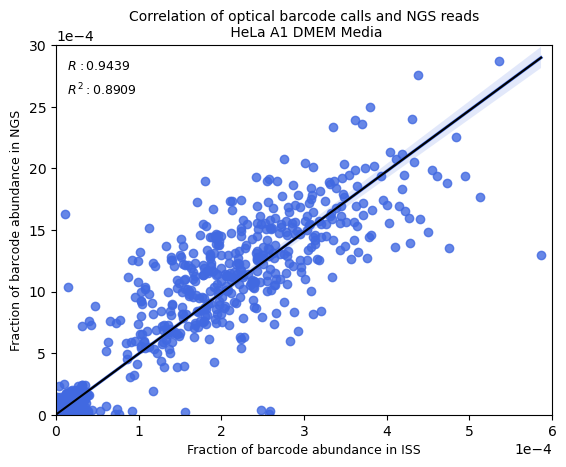

In [43]:
# Generate guide abundance correlation plots for HeLa DMEM Samples
plt.title('Correlation of optical barcode calls and NGS reads\n HeLa A1 DMEM Media', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('DMEM', HeLa_DMEM_Merged['Fraction_x'],HeLa_DMEM_Merged['Fraction_y'],'Fraction of barcode abundance in ISS','Fraction of barcode abundance in NGS',.0006,.0030,0.00001,.0028,0.00001,.0026)


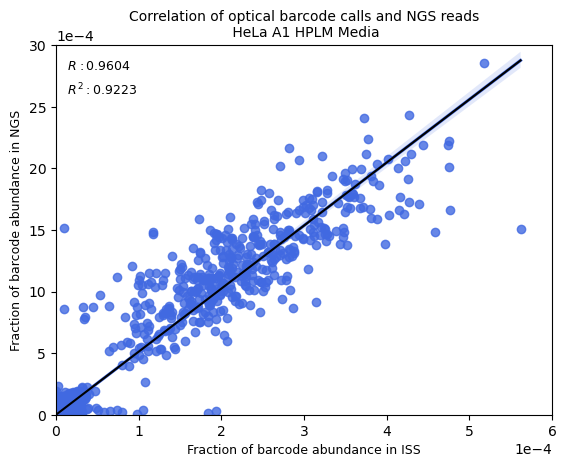

In [44]:
# Generate guide abundance correlation plots for HeLa HPLM Samples
plt.title('Correlation of optical barcode calls and NGS reads\n HeLa A1 HPLM Media', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HPLM', HeLa_HPLM_Merged['Fraction_x'],HeLa_HPLM_Merged['Fraction_y'],'Fraction of barcode abundance in ISS','Fraction of barcode abundance in NGS',.0006,.0030,0.00001,.0028,0.00001,.0026)


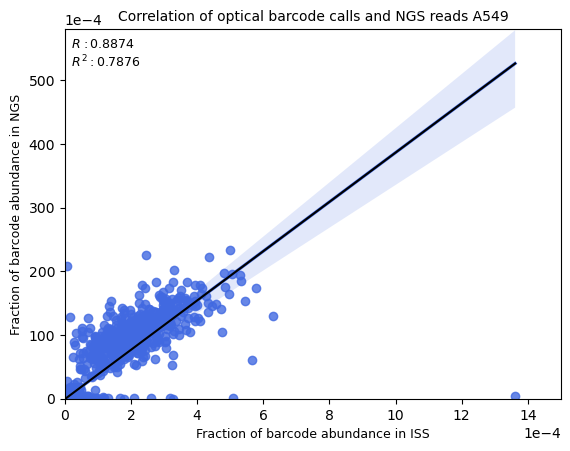

In [45]:
# Generate guide abundance correlation plots for A549 Samples
plt.title('Correlation of optical barcode calls and NGS reads A549', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('A549', A549_Merged['Fraction_x'],A549_Merged['Fraction_y'],'Fraction of barcode abundance in ISS','Fraction of barcode abundance in NGS',.0015,.0580,0.00001,.055,0.00001,.052)


# Extended Data Figure 2C-E, 6C-E, 7C-E

In [23]:
# If not running straight through, load metadata dataframe
"""
HeLa_DMEM_metadata_df = pd.read_csv(os.path.join(output_folder,'HeLa_DMEM_single_cell_metadata.csv.gz'))
HeLa_HPLM_metadata_df = pd.read_csv(os.path.join(output_folder,'HeLa_HPLM_single_cell_metadata.csv.gz'))
A549_metadata_df = pd.read_csv(os.path.join(output_folder,'A549_single_cell_metadata.csv.gz'))
"""

# Add bio replicate metadata to the HeLa DMEM dataframe.
BR_dic = {'CP257A': 'BR1', 'CP257D': 'BR1','CP257B': 'BR2', 'CP257H': 'BR2', 'CP257F': 'BR3'}
HeLa_DMEM_metadata_df['Metadata_Biological_Replicate'] = HeLa_DMEM_metadata_df['Metadata_Foci_plate'].map(BR_dic)

# Add bio replicate metadata to the HeLa HPLM dataframe.
BR_dic = {'CP257J': 'BR1', 'CP257N': 'BR2','CP257K': 'BR2', 'CP257L': 'BR3'}
HeLa_HPLM_metadata_df['Metadata_Biological_Replicate'] = HeLa_HPLM_metadata_df['Metadata_Foci_plate'].map(BR_dic)

# Add bio replicate metadata to the A549 dataframe.
BR_dic = {'CP186A': 'BR1', 'CP186B': 'BR1','CP186C': 'BR1', 'CP186D': 'BR2', 'CP186E': 'BR2', 'CP186F': 'BR2', 'CP186G': 'BR3', 'CP186H': 'BR3', 'CP186N': 'BR3'}
A549_metadata_df['Metadata_Biological_Replicate'] = A549_metadata_df['Metadata_Foci_plate'].map(BR_dic)

In [33]:
# Function to generate guide level cell counts per bio replicate per sample, 
# then normalize barcode calls by calculating the fraction of optical calls over total number of calls. 
def calculate_guide_level_counts(df):
    df = df['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
    df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)
    df['Fraction'] = df['Cell_Count']/(df['Cell_Count'].sum())
    df.sort_values('Cell_Count', ascending = False).reset_index()
    return df


# HeLa DMEM 
HeLa_DMEM_BR1_count_guide_df = calculate_guide_level_counts(HeLa_DMEM_metadata_df.loc[HeLa_DMEM_metadata_df['Metadata_Biological_Replicate'] == 'BR1'])
HeLa_DMEM_BR2_count_guide_df = calculate_guide_level_counts(HeLa_DMEM_metadata_df.loc[HeLa_DMEM_metadata_df['Metadata_Biological_Replicate'] == 'BR2'])
HeLa_DMEM_BR3_count_guide_df = calculate_guide_level_counts(HeLa_DMEM_metadata_df.loc[HeLa_DMEM_metadata_df['Metadata_Biological_Replicate'] == 'BR3'])

# HeLa HPLM 
HeLa_HPLM_BR1_count_guide_df = calculate_guide_level_counts(HeLa_HPLM_metadata_df.loc[HeLa_HPLM_metadata_df['Metadata_Biological_Replicate'] == 'BR1'])
HeLa_HPLM_BR2_count_guide_df = calculate_guide_level_counts(HeLa_HPLM_metadata_df.loc[HeLa_HPLM_metadata_df['Metadata_Biological_Replicate'] == 'BR2'])
HeLa_HPLM_BR3_count_guide_df = calculate_guide_level_counts(HeLa_HPLM_metadata_df.loc[HeLa_HPLM_metadata_df['Metadata_Biological_Replicate'] == 'BR3'])

# A549 DMEM
A549_BR1_count_guide_df = calculate_guide_level_counts(A549_metadata_df.loc[A549_metadata_df['Metadata_Biological_Replicate'] == 'BR1'])
A549_BR2_count_guide_df = calculate_guide_level_counts(A549_metadata_df.loc[A549_metadata_df['Metadata_Biological_Replicate'] == 'BR2'])
A549_BR3_count_guide_df = calculate_guide_level_counts(A549_metadata_df.loc[A549_metadata_df['Metadata_Biological_Replicate'] == 'BR3'])


In [34]:
# Prepare sample dataframes for visualization by merging bio-rep level counts into one dataframe.This is necessary to account for sgRNAs that are not detected in all bio reps.
# a Cell_Count of zero is assigned to missing sgRNAs 

#HeLa HPLM 
HeLa_HPLM_df = pd.merge(pd.merge(HeLa_HPLM_BR2_count_guide_df,HeLa_HPLM_BR1_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode'),
                          HeLa_HPLM_BR3_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode').replace(np. nan,0)
HeLa_HPLM_df = HeLa_HPLM_df.rename(
    columns={'Cell_Count_x':'Count_BR2','Fraction_x':'Fraction_BR2',
             'Cell_Count_y':'Count_BR1','Fraction_y':'Fraction_BR1',
            'Cell_Count':'Count_BR3', 'Fraction':'Fraction_BR3'})

#HeLa DMEM 
HeLa_DMEM_df = pd.merge(pd.merge(HeLa_DMEM_BR1_count_guide_df,HeLa_HPLM_BR2_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode'),
                          HeLa_HPLM_BR3_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode').replace(np. nan,0)
HeLa_DMEM_df = HeLa_DMEM_df.rename(
    columns={'Cell_Count_x':'Count_BR1','Fraction_x':'Fraction_BR1',
             'Cell_Count_y':'Count_BR2','Fraction_y':'Fraction_BR2',
            'Cell_Count':'Count_BR3', 'Fraction':'Fraction_BR3'})

# A549 
A549_df = pd.merge(pd.merge(A549_BR2_count_guide_df,A549_BR1_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode'),
                          A549_BR3_count_guide_df,how='left',on='Metadata_Foci_Barcode_MatchedTo_Barcode').replace(np. nan,0)
A549_df = A549_df.rename(
    columns={'Cell_Count_x':'Count_BR2','Fraction_x':'Fraction_BR2',
             'Cell_Count_y':'Count_BR1','Fraction_y':'Fraction_BR1',
            'Cell_Count':'Count_BR3', 'Fraction':'Fraction_BR3'})


In [35]:
# One of the sgRNAs for gene KRT28, sgRNA: GTTGAAGAGCTAGATCAACG,  is an outlier in optical calls for all screening samples (A549, HeLa DMEM, and HeLa HPLM). 
# This guide is also identified as an outlier in comparison to NGS calls, where the average number of NGS reads assigned is 14 and the average number of optical calls was 79,000

# Remove outlier from sorted datframes
A549_df = A549_df.iloc[1:]
HeLa_DMEM_df = HeLa_DMEM_df.iloc[1:]
HeLa_HPLM_df = HeLa_HPLM_df.iloc[1:]


In [36]:
# Define figure functions to visualize and calculate pairwise correlations of guide abundance in biological replicates. 
def plot_scatter(dataset,x,y,x_name,y_name,x_lim,y_lim,r_loc_x,r_loc_y,r2_loc_x,r2_loc_y):
    
    sns.regplot(x=x,y=y,scatter=True, color = '#6495ED')
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='k')
    plt.xlabel(x_name, size=9)
    plt.ylabel(y_name, size=9)
    plt.xlim(0,x_lim)
    plt.ylim(0,y_lim)
    plt.ticklabel_format(axis='both', style='sci')

    
    global correlation
    correlation = np.corrcoef(x,y)[0,1]
    plt.text(r_loc_x,r_loc_y,r' $R:$' + str(round(correlation,4)), fontsize=9)
    plt.text(r2_loc_x,r2_loc_y,r' $R^2:$' + str(round((pow(correlation,2)),4)), fontsize=9)
    
    plt.savefig(os.path.join(output_folder,"figure_panels",f'{dataset}_{x_name}_vs_{y_name}.png'),
                dpi=400,
                facecolor='w',
                bbox_inches='tight',
                edgecolor='w')
    
    plt.show()

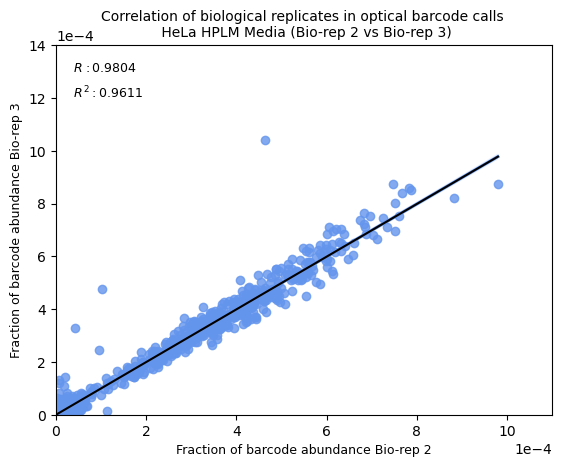

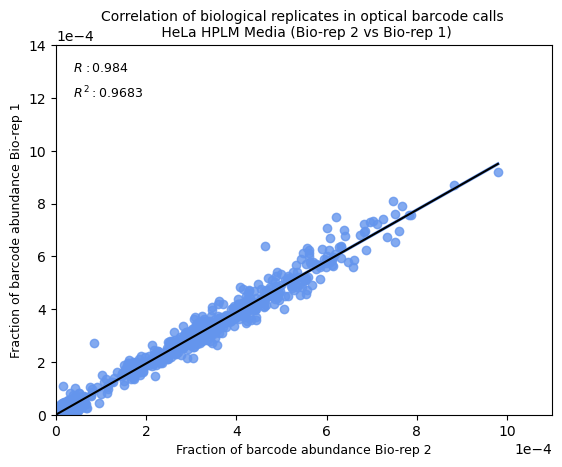

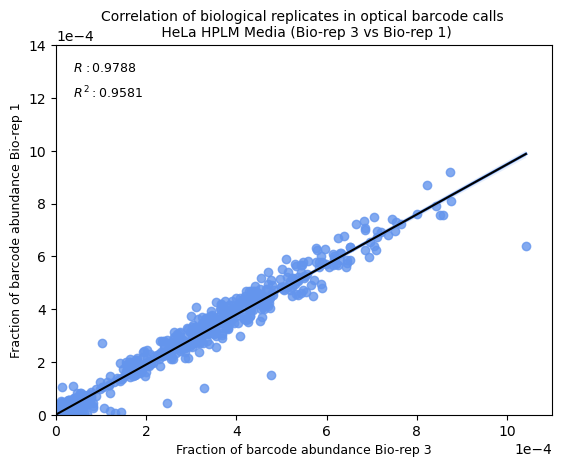

In [38]:
# Generate correlation plots for HeLa HPLM Samples

#BR2 vs BR3
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa HPLM Media (Bio-rep 2 vs Bio-rep 3)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa HPLM',HeLa_HPLM_df['Fraction_BR2'],HeLa_HPLM_df['Fraction_BR3'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 3',.0011,.0014,0.00003,.0013,0.00003,.0012)

#BR2 vs. BR3
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa HPLM Media (Bio-rep 2 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa HPLM',HeLa_HPLM_df['Fraction_BR2'],HeLa_HPLM_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 1',.0011,.0014,0.00003,.0013,0.00003,.0012)

#BR3 vs. BR1
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa HPLM Media (Bio-rep 3 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa_HPLM',HeLa_HPLM_df['Fraction_BR3'],HeLa_HPLM_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 3','Fraction of barcode abundance Bio-rep 1',.0011,.0014,0.00003,.0013,0.00003,.0012)

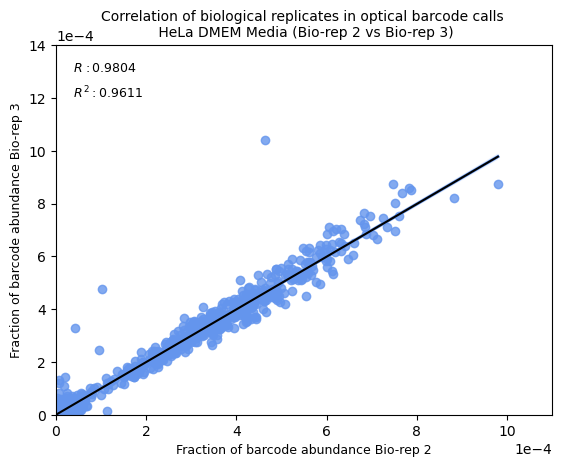

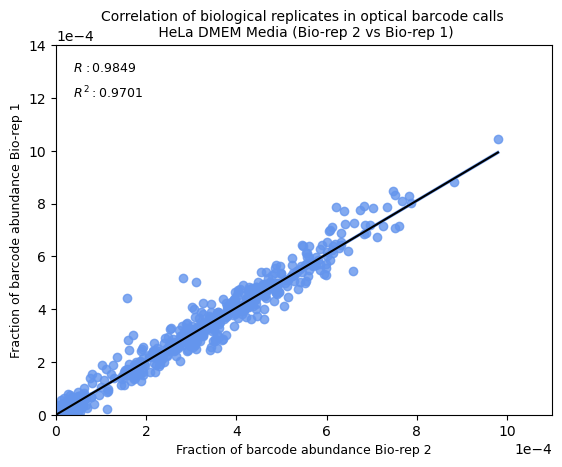

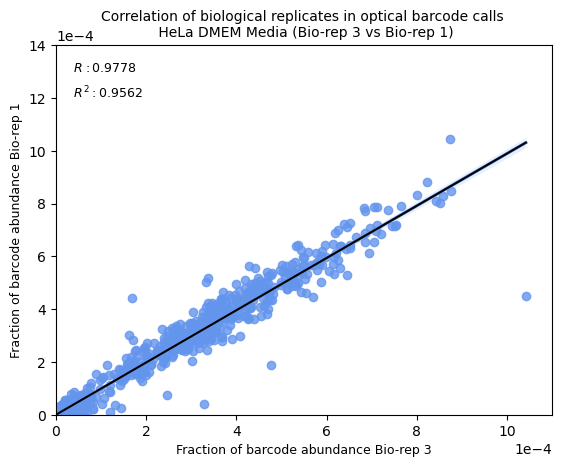

In [39]:
# Generate correlation plots for HeLa DMEM Samples

#BR2 vs BR3
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa DMEM Media (Bio-rep 2 vs Bio-rep 3)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa_DMEM',HeLa_DMEM_df['Fraction_BR2'],HeLa_DMEM_df['Fraction_BR3'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 3',.0011,.0014,0.00003,.0013,0.00003,.0012)

#BR2 vs. BR3
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa DMEM Media (Bio-rep 2 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa_DMEM',HeLa_DMEM_df['Fraction_BR2'],HeLa_DMEM_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 1',.0011,.0014,0.00003,.0013,0.00003,.0012)

#BR3 vs. BR1
plt.title('Correlation of biological replicates in optical barcode calls \n HeLa DMEM Media (Bio-rep 3 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('HeLa_DMEM',HeLa_DMEM_df['Fraction_BR3'],HeLa_DMEM_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 3','Fraction of barcode abundance Bio-rep 1',.0011,.0014,0.00003,.0013,0.00003,.0012)

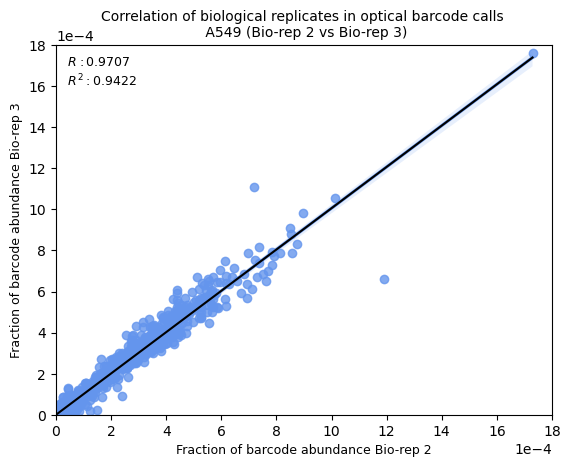

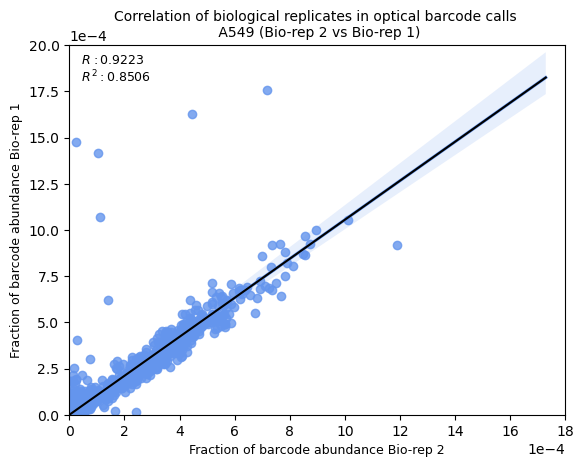

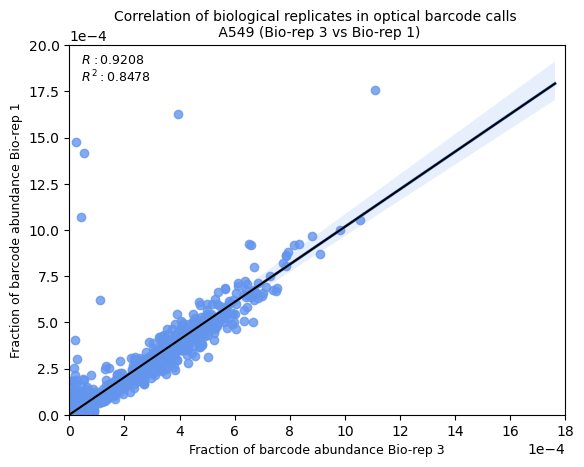

In [37]:
# Generate correlation plots for A549 DMEM Samples

#BR2 vs BR3
plt.title('Correlation of biological replicates in optical barcode calls \n A549 (Bio-rep 2 vs Bio-rep 3)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('A549',A549_df['Fraction_BR2'],A549_df['Fraction_BR3'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 3',x_lim=0.0018,y_lim=0.0018,r_loc_x=0.00003,r_loc_y=0.0017,r2_loc_x=0.00003,r2_loc_y=0.0016)

#BR2 vs. BR3
plt.title('Correlation of biological replicates in optical barcode calls \n A549 (Bio-rep 2 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('A549',A549_df['Fraction_BR2'],A549_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 2','Fraction of barcode abundance Bio-rep 1',x_lim=0.0018,y_lim=0.0020,r_loc_x=0.00003,r_loc_y=0.0019,r2_loc_x=0.00003,r2_loc_y=0.0018)

#BR3 vs. BR1
plt.title('Correlation of biological replicates in optical barcode calls \n A549 (Bio-rep 3 vs Bio-rep 1)', fontsize='10')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))
plot_scatter('A549',A549_df['Fraction_BR3'],A549_df['Fraction_BR1'],'Fraction of barcode abundance Bio-rep 3','Fraction of barcode abundance Bio-rep 1',x_lim=0.0018,y_lim=0.0020,r_loc_x=0.00003,r_loc_y=0.0019,r2_loc_x=0.00003,r2_loc_y=0.0018)

# Extended Data Figure 2C-F

In [10]:
# Import the guide-level profiles without feature selection
usecols=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Cells_Intensity_MeanIntensity_Mito']
df_guide_A549 = pd.read_csv("../6_Single_Features/inputs_data/20200805_A549_WG_Screen_guide_normalized_median_merged_ALLBATCHES_ALLWELLS.csv",usecols=usecols)

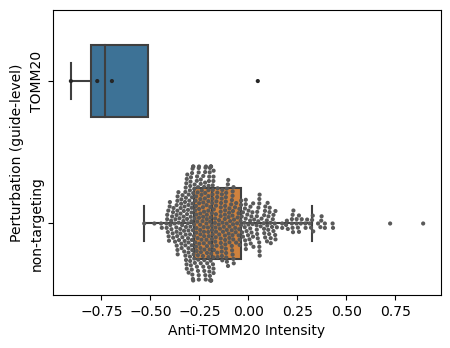

In [11]:
# 
def plot_tomm20_intensity(df_guide,gene,feature,group):
    tomm20_guide_DMEM = df_guide.query('Metadata_Foci_Barcode_MatchedTo_GeneCode == @gene')
    nontargeting_guide_DMEM = df_guide.query('Metadata_Foci_Barcode_MatchedTo_GeneCode == "nontargeting"')

    tomm20_guide_DMEM_int = tomm20_guide_DMEM[["Metadata_Foci_Barcode_MatchedTo_GeneCode",feature]]
    nontargeting_guide_DMEM_int = nontargeting_guide_DMEM[["Metadata_Foci_Barcode_MatchedTo_GeneCode",feature]]
    
    tomm20_list = tomm20_guide_DMEM_int[feature].tolist()
    nontargeting_list = nontargeting_guide_DMEM_int[feature].tolist()
    
    fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize=(5, 3.7))
    data = [tomm20_list,nontargeting_list]
    #ax1 = plt.boxplot(nontargeting_list)
    ax = sns.boxplot(data,fliersize=0,width=0.5,saturation=0.6,orient = 'h')
    ax = sns.swarmplot(data,size= 3 ,palette='dark:0.35',orient = 'h')
    plt.xlabel('Anti-TOMM20 Intensity')
    plt.ylabel('Perturbation (guide-level)')

    ax.set_yticklabels([gene,'non-targeting'], rotation=90, verticalalignment='center')
    plt.show()
    output_file = f'{group}_{gene}_intensity_boxplot.png'
    fig.savefig(os.path.join(output_folder,output_file),dpi=300)
plot_tomm20_intensity(df_guide_A549, "TOMM20", "Cells_Intensity_MeanIntensity_Mito","A549")